# <center>Introduction on Using Python to access GeoNet's Volcano Chemistry data

In this tutorial we look at getting volcano chemistry data from a set area. This notebook has the functions needed to get data as well as some examples of how to use them. As a result the user will be able to make a table like the one below for a set area then get data and graph it<img src="sites.png">
<img src="plot.png">


## &nbsp; Table of contents

### 1. Introduction
### 2. Set Up 
### 3. Define Area of Interest
### 4. Get Site Data
### 5. Define Functions
#### &nbsp; 5.1 Get Volcano Data
#### &nbsp; 5.2 Get Methods
### 6. Temperature Example
#### &nbsp; 6.1 Get Methods used
#### &nbsp; 6.2 Get observation data
#### &nbsp; 6.3 Plot data
#### &nbsp; 6.4 Trim data
#### &nbsp; 6.5 Save data

## &nbsp; 1. Introduction

In this tutorial the user will learn how to use Python to access Volcano data.
GeoNet has a API (Application Programming Interface) to access its Volcano data. The user doesn't need to know anything about APIs to use this tutorial. If you would like more info see https://fits.geonet.org.nz/api-docs/. 

To use this tutorial if not using binder you will need to install the package pandas (https://pandas.pydata.org/).

This tutorial assumes that you have a basic knowledge of Python.

###### About GeoNet Volcano Chemistry data

GeoNet uses many methods to monitor volcanic activity in and around NZ. One of the method's used is to analyse gas and water samples. <br>
This chemistry data, dating back to the 1950’s, can be accessed using GeoNet’s API. 
The types of data and frequency of collection changes from site to site, but a full list of all types of data collected can be found at https://github.com/GeoNet/data-tutorials/blob/master/Volcano_Data/typeIDs.csv , or at http://fits.geonet.org.nz/type (for best formatting use firefox)

For an overview on how GeoNet monitors volcanic activity go to https://www.geonet.org.nz/volcano/how

## &nbsp; 2. Set Up 

###### Import packages

In [1]:
import json # package to read json code
import requests # package to get data from an API
import pandas as pd # package for data frames
import datetime # package to deal with time
import matplotlib.pyplot as plt #package to do ploting

## &nbsp; 3. Define Area of Interest

You can define you area of interest in the shape of any polygon. In this example we will be looking at a square as our polygon. 

###### Define the longitude and latitude of the point of interest

In [2]:
point_long = 175.565
point_lat = -39.281
box_size = 0.1

Define the longitude and latitude of the point of interest as well as how far out from that point you want to look (`box_size`) in . e.g Here the point of interest is Mount Ruapehu and we have made a small box as to not include Mount Tongariro in this box.

###### Set parameters for area of interest.

In [3]:
long_max = str(point_long + box_size) 
long_min = str(point_long - box_size)
lat_max  = str(point_lat - box_size)
lat_min  = str(point_lat + box_size)

This set the 4 edge points of the box we will look for sites in.

###### Make box

In [4]:
poly = ("POLYGON((" +long_max + " " +lat_max
      +","+long_max+" "+lat_min
      +","+long_min+" "+lat_min
      +","+long_min+" "+lat_max
      +","+long_max+" "+lat_max +"))")
print (poly)

POLYGON((175.665 -39.381,175.665 -39.181,175.465 -39.181,175.465 -39.381,175.665 -39.381))


Here, we use the points worked out before to make a box that is formatted in the right way to put into our URL later

## &nbsp; 4. Get Site Data

###### Set URL

In [5]:
base_url = "https://fits.geonet.org.nz/"
endpoint = "site"

The base URL should be set as above, and the endpoint is set to site to get the site data. Site data is the locations, names and siteIDs where samples were collected. There are other endpoints which will return different information such as plot and observation. To learn more go to https://fits.geonet.org.nz/api-docs/.

###### Combine URL and endpoint

In [6]:
url = base_url + endpoint

Combine the base URL and the endpoint to give the information needed to request the data.

###### Set query parameters

In [7]:
parameters ={'within':poly}
print (parameters)
print (requests.get(url, params=parameters))

{'within': 'POLYGON((175.665 -39.381,175.665 -39.181,175.465 -39.181,175.465 -39.381,175.665 -39.381))'}
<Response [200]>


###### Get site data

In [8]:
sites = requests.get(url, params=parameters)
print (sites)

<Response [200]>


We use `requests.get` to get the data using the URL we made earlier and the parameters we set in the last stage

###### Read the json data

In [9]:
data = sites.json()['features']

This line of code reads the JSON(JavaScript Object Notation) data that is at the URL, so that Python can read it. 

###### Initialize this data frame

In [10]:
ruapehu = pd.DataFrame() #empty dataframe

We are now going to put this data into a data frame to make it easer for us to read. 

##### Why make the data into a data frame?

A data frame is a way of formatting data into a table with column and row name much like a csv file and makes long list of data a lot easier to use.
Data frame data can be called by column or row name making it easy to get the point(s) of data you want. Data, much like in a table, can be “linked”, so that you can do something like plot a data point on a 2D plot. Sadly, data frames are not a built-in data format in Python, so we must use the pandas (https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) package to be able to make a data frame.

###### Add the site data to this data frame

In [11]:
for i, val in enumerate(data):
  geometry = val['geometry']
  lon = geometry['coordinates'][0]
  lat = geometry['coordinates'][1]
  properties = val['properties']
  siteID = properties['siteID']
  height = properties['height']
  name = properties['name']
  #append these to df
  ruapehu = ruapehu.append({'siteID': siteID, 'lon': lon, 'lat': lat, 'height': height, 'name': name}, ignore_index=True)

Here, we extract the values for siteID, name, longitude and latitude. Then format it into a data frame. 

###### Print out this data frame

In [12]:
ruapehu #will show dataframe

,height,lat,lon,name,siteID
0,2529.000,-39.281281,175.564369,"Ruapehu Crater Lake, Whole Lake",RU002
1,1280.000,-39.224927,175.527965,"Ruapehu, Silica Rapids",RU020
2,2529.000,-39.283500,175.565400,Ruapehu Crater Lake Outlet,RU001B
3,1161.000,-39.199839,175.542240,Chateau Observatory,RU010
4,2529.000,-39.283500,175.565400,Ruapehu Crater Lake Outlet,RU001A
5,2529.000,-39.281281,175.564369,Ruapehu Volcano,RU000
6,1230.000,-39.200689,175.604190,"Tongariro, Lower Tama Lake",TO051
7,2529.000,-39.283500,175.565400,Ruapehu Crater Lake Outlet,RU001
8,2529.000,-39.281600,175.565000,Ruapehu Crater Lake Central Vent,RU003
9,2049.505,-39.255000,175.552500,Far West,VGFW


Volcano sites are set up with site ID a set format. The first 2 letter are for the volcano eg. "RU" for Ruapehu. Then 3 number eg. "RU002" is the whole crater lake on Ruapehu. The site with other formatting are more likely to be GNSS sites.

###### Save site information

In [13]:
ruapehu.to_csv("ruapehu_sites.csv")

This saves the data frame csv file with the same formatting as the data frame. It will have saved in the same place as this notebook is run from

## &nbsp; 5. Define Functions

When we want to run code many times it is best to write it as a function. A function is a block of code that can be called later in the code with just one line of code. A function should take a set number of inputs and return some output. In Python as long as a function is in the code, it dosen't matter is we put the function before or after we call it. 

###  &nbsp; 5.1 Get Volcano Data

In [14]:
def get_volcano_data(site,typeID):
    """
    This function takes a site ID and type ID as a strings
    and returns a dataframe with all the observation of that type for that site
    """
    #Setup
    base_url = "https://fits.geonet.org.nz/"
    endpoint = "observation"
    url = base_url + endpoint
    
    #Set query parameters
    parameters ={"typeID": typeID, "siteID": site}
    
    #Get data
    request = requests.get(url, params=parameters)
    
    #Unpack data
    data = (request.content)
    
    #If there are data points
    if len(data) > 50:
        #run volcano_dataframe on it
        df = volcano_dataframe(data.decode("utf-8"))
        #print some info on it 
        print(site,"has", typeID, "data and has", len(df.index), 
              "data points from ",df['date-time'][1]," to ", df['date-time'][len(df.index)])
        #retrun it
        return df

The function `get_volcano_data` takes a site ID and type ID and ruturns dataframe with all the observation if there is observation data, else it will just return `NONE`.This funtion uses the `volcano_dataframe` function. This works much the same as the function in the https://github.com/JenLowe/data_tutorials/blob/master/GNSS_Data/Python/Introduction_to_GNSS_data_using_FITS_in_Python.ipynb 
notebook to get GNSS data. More on how each line is working can be found in this notebook. 
If you are using Python2 remove the code `.decode("utf-8")`

In [15]:
def volcano_dataframe(data):
    """
    This function turns the string of volcano data received by requests.get
    into a data frame with volcano data correctly formatted.
    """
    # splits data on the new line symbol
    data = data.split("\n") 
    
    # For each data point
    for i in range(0, len(data)):
        data[i]= data[i].split(",")# splits data ponits on the , symbol
     
    # For each data point 
    for i in range(1, (len(data)-1)):
        data[i][0] = datetime.datetime.strptime(data[i][0], '%Y-%m-%dT%H:%M:%S.%fZ') #make 1st value into a datetime object
        data[i][1] = float(data[i][1]) #makes 2nd value into a decimal number
        data[i][2] = float(data[i][2]) #makes 3rd value into a decimal number
        
    #make the list into a data frame
    df = pd.DataFrame(data[1:-1],index = range(1, (len(data)-1)), columns=data[0]) #make the list into a data frame
    
    #Return this data frame
    return df 

The function `volcano_dataframe` takes a string of data and returns this reformated as a data frame.

### &nbsp; 5.2 Get Methods

In [16]:
def get_method(typeID):
    """
    This function takes a type ID as a strings
    and returns all methods used for this type
    """
    
    #Setup
    base_url = "https://fits.geonet.org.nz/"
    endpoint = "method"
    url = base_url + endpoint
    
    #Set query parameters
    parameters ={"typeID": typeID}
    
    #Get data
    request = requests.get(url, params=parameters)
    
    #Unpack data
    data = request.json()['method']
    
    #run make_method_df on data
    df =  make_method_df(data)
    
    return df

The function `get_method` takes a type ID and returns all methods used for this type. This function use the function `make_method_df`. 

In [17]:
def make_method_df(data):
    """
    This function takes method data as a list
    and returns a dataframe with all the method data.
    """
    #Initialize this data frame
    df = pd.DataFrame()
    
    #add data to the data frame
    for i, val in enumerate(data):
        methodID = val['methodID']
        name = val['name']
        description = val['description']
        reference = val['reference']
        #append these to df
        df = df.append({'name': name, 'methodID': methodID, 'description': description, 'reference':reference}, 
                       ignore_index=True)
    
    #Return this data frame
    return df

The function `make_method_df` makes a data frame from list data, like for the site data. It takes method data as a list and returns a dataframe with all the method data.

## &nbsp; 6. Temperature Example

In this example we look at geting data about the temperature in the water of Ruapehu's Crater Lake. We look at geting all the data the GeoNet has then triming this data to look at only a set time. 

You can find a list of type ID at (https://github.com/GeoNet/data-tutorials/blob/master/Volcano_Data/typeIDs.csv, or at http://fits.geonet.org.nz/type (for best formatting use firefox) but most of the type ID are in the format (chemical analyte)-(g/w) where g is for gas and w is for water. e.g. Cl-w is for Chloride in water. 

###### Set the type to the type ID for temperature

In [18]:
typeID = "t"

## &nbsp; 6.1 Get Methods used

###### Get the methods for this type ID

In [19]:
methods = get_method(typeID)

The code above runs the `get_method` funtion.

###### Print method data

In [20]:
methods # Show the dataframe 

,description,methodID,name,reference
0,mercury thermometer,therm,thermometer,http://en.wikipedia.org/wiki/Thermometer
1,thermocouple thermometer,thermcoup,thermocouple,http://en.wikipedia.org/wiki/Thermocouple
2,infrared thermometer,therminfra,therminfrared,http://en.wikipedia.org/wiki/Infrared_thermometer
3,FLIR camera,flir,thermflir,http://en.wikipedia.org/wiki/Forward_looking_i...
4,An instrument recording different types of atm...,weathersta,weather station,https://en.wikipedia.org.nz/wiki/Weather_station
5,"an integrated circuit temperature sensor, ofte...",logic,integrated circuit and data logger,http://www.ti.com/product/LM35
6,"a thermocouple, recorded by a data logger",logthermcoup,thermocouple and data logger,https://en.wikipedia.org/wiki/Thermocouple
7,"a platinum resistance thermometer, recorded by...",logprt,platinum resistance thermometer and data logger,https://en.wikipedia.org/wiki/Resistance_therm...
8,processed thermal image from a satellite,sattherm,satellite thermal imagery,https://en.wikipedia.org/wiki/Satellite_imagery


## &nbsp; 6.2 Get observation data


Now, we are going to get all temperature data from all these sites, and put it in a single data structure

###### Get all temperature data from all these sites

In [21]:
#Initialize a list to put the data in later
t={}
#loop over each site ID
for i, site in enumerate(ruapehu["siteID"]):
    #use the get_volcano_data funtion to get the data and save it with the key of the site's ID
    t.update({site:get_volcano_data(site,typeID)})

RU002 has t data and has 27 data points from  2007-09-03 00:00:00  to  2009-07-13 00:00:00
RU020 has t data and has 23 data points from  1990-03-18 00:15:00  to  2020-06-26 00:00:00
RU001B has t data and has 16287 data points from  2019-05-21 04:30:00  to  2021-04-08 11:15:00
RU010 has t data and has 193013 data points from  2007-05-21 00:45:00  to  2016-05-30 11:00:00
RU001A has t data and has 18283 data points from  2016-03-04 03:15:00  to  2018-12-19 15:45:00
TO051 has t data and has 24 data points from  1994-03-30 00:00:00  to  2020-12-31 00:00:00
RU001 has t data and has 115386 data points from  1950-03-01 00:00:00  to  2021-04-08 11:15:00
RU003 has t data and has 191 data points from  1998-03-17 00:00:00  to  2021-03-17 00:00:00
RU004 has t data and has 80 data points from  1991-01-13 00:00:00  to  2021-03-17 00:00:00


The above code loops over the siteIDs and and runs `get_volcano_data`, so that if it there is data for that site then it is saves into `t` with the "key" as the siteID 

Note that have made a dictionary with keys of siteIDs which are linked to the data frames with the data from this siteID. 

RU001 is the site ID for Ruapehu crater lake outlet so lets look more at this site

###### Print the first few lines of the data frame

In [22]:
t['RU001'].head()

,date-time,t (C),error (C)
1,1950-03-01,24.4,0.5
2,1954-02-14,22.3,0.5
3,1954-02-17,21.1,0.5
4,1954-10-22,38.0,0.5
5,1955-12-30,25.0,0.5


`t[RU001]` is use to access the temperature data frame for the site with the siteID RU001. 

## &nbsp; 6.3 Plot data

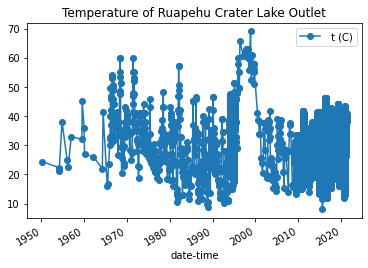

In [23]:
plot = t['RU001'].plot(x='date-time', y= ' t (C)', marker='o', title = 'Temperature of Ruapehu Crater Lake Outlet')
#plt.savefig("plot") 

The above code plots time on the x axis and the temperature on the y axis. `marker = ‘o’` makes each point of data a small circle. If you want to save the plot as a png file in the folder you are running this code from you can uncomment ` plt.savefig("plot")`

## &nbsp; 6.4 Trim data

The data for the Ruapehu crater lake outlet has data all the way back to the 1950s, but I want to look at the data in just one part of this time

###### Set times you want to look at

In [24]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2019, 1, 1)

Dates are in the order year, month, day

###### Trim the data

In [25]:
df = t['RU001'].loc[t['RU001']['date-time']<end]
df = df.loc[t['RU001']['date-time']>start]

`t['RU001']['date-time']<end` makes a list saying what rows have date that is before the end date set above. `loc` then say to keep only the points for "RU001" that are before the end date. This is then saved as dataframe. 
The next line of code does the same but for time after the start date. 

###### Plot trimed data

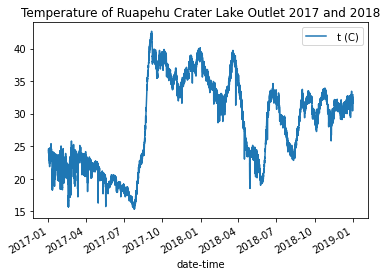

In [26]:
plot2 = df.plot(x='date-time', y= ' t (C)', title = 'Temperature of Ruapehu Crater Lake Outlet 2017 and 2018')

Done as plot above. 

## &nbsp; 6.5 Save data

###### Save as CSV file

In [27]:
t['RU001'].to_csv("RU001_temp_in_ruapehu.csv")

This saves the data frame csv file with the same formatting as the data frame. It will have saved in the same place as this notebook is run from and be named `RU001_temp_in_ruapehu`

## Useful links

<ul>
    <li>This notebook uses Python https://www.python.org/
    <li>This notebook also uses pandas https://pandas.pydata.org/
    <li>There is a notebook on this data set in R at https://github.com/GeoNet/data-tutorials/blob/master/Volcano_Data/R/Volcano_Chemistry_data_using_FITS_in_R
    <li>More tutorials on volcano data can be found at https://github.com/GeoNet/data-tutorials/blob/master/Volcano_Data     
    <li>For more on data types in FITS go to http://fits.geonet.org.nz/type (for best formatting use firefox)
    <li>For more on FITS go to https://fits.geonet.org.nz/api-docs/   
</ul>